# Artigo 4
* Aluno: Paulo Henrique Costa Gontijo
* Matrícula: 15/0143800
* Lição: *Natural Language (NLP)*
* Notebook: *NLP Deep Dive: RNNs*

| Hitórico de versão | Data |
|:--------------------:|:------:|
| v1 | 14/12/2022 |

## Propósito
Este artigo tem a intenção de documentar o passo a passo da quarta lição do curso, mostrando os blocos de códigos, o resultado das execuções, eventuais problemas encontrados e, se houver, as possíveis soluções para os problemas.

## Tema
A lição 4 do curso FastAi tem como objetivo apresentar maneiras de se trabalhar com processamento de linguagem natural. Apresenta alguns fundamentos sobre redes neurais e técnicas para se trabalhar com os datasets. 

## Instalação das Bibliotecas


In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 14.6 MB/s 
     |████████████████████████████████| 1.3 MB 49.8 MB/s 
     |████████████████████████████████| 5.8 MB 61.2 MB/s 
     |████████████████████████████████| 451 kB 72.6 MB/s 
     |████████████████████████████████| 1.6 MB 52.3 MB/s 
     |████████████████████████████████| 132 kB 15.2 MB/s 
     |████████████████████████████████| 182 kB 67.5 MB/s 
     |████████████████████████████████| 212 kB 80.5 MB/s 
     |████████████████████████████████| 127 kB 76.6 MB/s 
     |████████████████████████████████| 7.6 MB 56.5 MB/s 
Mounted at /content/gdrive


## Importação das Bibliotecas

In [ ]:
#hide
from fastbook import *
from IPython.display import display,HTML

## Processamento de Texto
É apresentada, na lição, alguns fundamentos sobre processamento de texto, dentre eles podemos enumeras algumas etapas importantes para sucesso no processo. São elas:

1. Listar todos os possíveis níveis de variáveis categóricas. Esses níveis são chamados de `vocab`;
1. Associar a cada chave do `vocab` a um index **único**;
1. Treinar o algoritmo com o vocabulário indexado;
1. Gerar predições.


As etapas listadas acima possuem alguns jargões comuns no contexto de processamento de linguagem natural. Muitos deles originam-se nas bibliotecas Fastai e PyTorch.

Abaixo seguem alguns termos importantes:

* *Tokenization* ou 'Tokenização': conversor de texto em um lista de palavras, termos, caracteres -  a depender do contexto;
* *Numericalization* ou 'Numericalização': associa um lista de textos, com termos únicos, à indexadores únicos. Seguem o padrão chave-valor;
* *Language Model Data Loader* ou 'Carregador de dados de modelos de linguagem': classe responsável por carregar os dados para treinamento, criando um DataBlock de textos;
* *Language Model Creation* ou 'Criação de Modelos de Linguagem': como o próprio nome diz, trata-se da fase de treinamento do bloco de dados de texto e criação do modelo.

#### Download do Dataset
Disponibilizado pelo próprio *framework* **fastai**

In [ ]:
from fastai.text.all import *
path = untar_data(URLs.AMAZON_REVIEWS_POLARITY)
path

Path('/root/.fastai/data/amazon_review_polarity_csv')

* Houve a tentativa com URLs.AMAZON_REVIEWS e o resultado foi o seguinte erro:

> Exception: Downloaded file is corrupt or not latest version

#### Interação com os dados
Em um dataframe, aplica-se algumas tratativas de *data cleaning* e *data pattern*.

In [ ]:
files = pd.read_csv(path/'train.csv', nrows=100000, header=None, names=['rate', 'short_desc', 'text'])
files.replace({2:'pos', 1:'neg'}, inplace=True)
files.head(3)

,rate,short_desc,text
0,pos,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
1,pos,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
2,pos,Amazing!,"This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like ""Chrono Cross ~ Time's Scar~"", ""Time of the Dreamwatch"", and ""Chronomantique"" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears s..."


# Tokenização
Técnica utilizada para segmentar frases e/ou palavras. A partir do seu resultado é possível classificar as mais diversas variações de texto presentes no dataset.

In [ ]:
txt = files['text'].iloc[0]
spacy = WordTokenizer()
tkn = Tokenizer(spacy)
print(coll_repr(tkn(txt), 31))

(#88) ['xxbos','xxmaj','this','sound','track','was','beautiful','!','xxmaj','it','paints','the','senery','in','your','mind','so','well','i','would','recomend','it','even','to','people','who','hate','vid','.','game','music'...]


Abaixo seguem alguns padrões de associação, feitas pela função aplicada>

> - `xxbos`: indica o começo de um texto;
> - `xxmaj`: indica que a próxima palavra começa com letra maiúscula.
> - `xxunk`: indica uma palavra desconhecida


## Numericalização
Processo que associa indexes aos termos únicos, obtidos acima.

In [ ]:
toks = tokenize_df(files, text_cols=list(files.columns))

In [ ]:
str(toks[1])[:500]

'Counter({\'xxmaj\': 799155, \'.\': 419507, \'the\': 410010, \'xxfld\': 300000, \',\': 298760, \'i\': 222529, \'and\': 218246, \'a\': 206164, \'to\': 191351, \'it\': 177665, \'of\': 169004, \'this\': 152104, \'is\': 149392, \'xxup\': 146865, \'3\': 113246, \'2\': 107294, \'1\': 104493, \'xxbos\': 100000, \'in\': 97041, \'that\': 84512, \'for\': 82262, \'was\': 74989, \'"\': 71475, \'you\': 68725, \'not\': 63695, "\'s": 61697, \'!\': 61352, \'book\': 61313, \'but\': 59397, \'with\': 56712, \'on\': 54603, \'have\': 52499, \'-\': 52074, "n\'t": 51601, \'pos\': 51306'

## Carregamento dos Dados 
Utilizando a classe **TextDataLoaders**, a fim de criar o bloco de dados insumo para treinamento do modelo.

In [ ]:
dls = TextDataLoaders.from_df(files, path=path, csv_fname='train.csv', text_col='text', label_col='rate')
dls.show_batch(max_n=3)

,text,category
0,xxbos xxup buyer xxup beware ! ! ! yes xxup the xxup diapers xxup are xxup good xxup but i xxup received xxup the xxup diapers xxup with xxup stains xxup they xxup look xxup like xxup dna xxup stains . xxup so i xxup call xxup the xxup company xxup and xxup they xxup instruct xxup me xxup to xxup xxunk xxup them xxup away xxup all 200 xxup diapers xxup wow . xxup so i xxup wait xxup in xxup the xxup mail xxup for xxup some xxup coupons xxup they xxup are xxup supposed xxup to xxup send xxup me xxup and xxup turns xxup out i xxup have xxup to xxup spend xxup more xxup money xxup in xxup order xxup to xxup get xxup the xxup diapers i xxup had xxup already xxup paid xxup for . xxup so i xxup call xxup company xxup,neg
1,"xxbos xxup this xxup is xxup the xxup worst xxup book xxup ever xxup written ! xxup it xxup was xxup painful xxup for xxup me xxup to xxup read xxup this xxup garbage ! xxup margaret xxup mitchell xxup was xxup obviously xxup racist ! xxup c'm on , xxup just xxup read xxup the xxup part xxup about xxup reconstruction ! xxup and xxup how xxup scarlett xxup can xxup treat xxup the xxup slaves xxup like xxup dirt xxup after xxup they xxup had xxup made xxup tara a xxup plantation , xxup and xxup kept xxup food xxup on xxup the xxup table ! xxup really , xxup if xxup rhett xxup loved xxup her "" so "" xxup much , xxup how xxup could xxup he xxup just xxup leave xxup her xxup like xxup that ! xxup this xxup book xxup could xxup have",neg
2,"xxbos xxmaj definely this is the album to buy , this is the best work that r.kelly has done . xxmaj for me , xxup the xxup most xxup realize xxup r&b ; xxup album xxup ever xxup made xxup and xxup that s xxup for xxup sure . i really do nt care what xxunk ) are saying , xxup r.kelly is and forever will be a xxup legend , a xxup classic xxup singer , xxup songwritter , xxup arranger , producer , xxup xxunk xxup and xxup multi - instrumentalist … however xxup all xxup the 19 xxup songs xxup are xxup red xxup hot , but xxup the xxup most xxup heard xxup by xxup me xxup are : xxup xxunk , xxup r&b ; xxup thug , xxup strip xxup for xxup you , xxup greatest xxup sex , i xxup don`t xxup mean xxup",pos


## Criação do Modelo
A partir do modelo, pré-treinado, `AWD_LSTM`, aplicamos o treinamento e refinamento de tal modelo a partir dos dados do dataset trabalhado. Dessa forma, pode-se incorporar ao vocabulário original o estilo de texto alvo do contexto do artigo: *review* de produtos da Amazon.

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.494038,0.423125,0.812250,02:09


epoch,train_loss,valid_loss,accuracy,time
0,0.353576,0.291312,0.881700,02:42
1,0.289360,0.238755,0.902650,02:52
2,0.263142,0.228691,0.909200,02:58
3,0.236884,0.226162,0.912250,02:53
4,0.222579,0.225129,0.913750,02:57


## Resultados do Treinamento

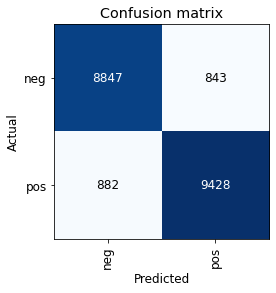

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Predição
Uma vez que tem-se o modelo treinado e refinado, é possível testar o resultado e conferir a acertividade do modelo.

In [ ]:
learn.predict('I loved this product')

('pos', tensor(1), tensor([0.0026, 0.9974]))

In [ ]:
learn.predict('I hated this product')

('neg', tensor(0), tensor([0.5253, 0.4747]))

In [ ]:
learn.predict('Even if this product is small, it has a good quality')

('pos', tensor(1), tensor([0.0444, 0.9556]))

In [ ]:
learn.predict('Even if this product is small and ugly, it has a good quality')

('pos', tensor(1), tensor([0.0763, 0.9237]))

In [ ]:
learn.predict('Even if this product is big and beautiful, it has a bad quality')

('neg', tensor(0), tensor([0.8393, 0.1607]))

## Deploy do modelo

In [ ]:
learn.export('model.pkl')

# Referências Bibliográficas

> https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb, acessado em 12/12/2022.

> https://docs.fast.ai/tutorial.text.html, acessado em 13/12/2022.

> https://paperswithcode.com/method/awd-lstm, acessado em 13/12/2022.

> https://docs.fast.ai/tutorial.datablock.html#text, acessado em 14/12/2022.